In [7]:
pip install gensim

     |████████████████████████████████| 24.7 MB 108 kB/s eta 0:00:01     |██████████████████████████████▍ | 23.5 MB 271 kB/s eta 0:00:05
     |████████████████████████████████| 99 kB 100 kB/s ta 0:00:01
     |████████████████████████████████| 128 kB 115 kB/s eta 0:00:01
     |████████████████████████████████| 75 kB 267 kB/s eta 0:00:01
     |████████████████████████████████| 69 kB 220 kB/s eta 0:00:01
     |████████████████████████████████| 6.0 MB 310 kB/s eta 0:00:01
     |████████████████████████████████| 76 kB 208 kB/s eta 0:00:01
     |████████████████████████████████| 547 kB 217 kB/s eta 0:00:01
     |████████████████████████████████| 70 kB 860 kB/s eta 0:00:01
     |████████████████████████████████| 155 kB 308 kB/s eta 0:00:01
     |████████████████████████████████| 1.3 MB 104 kB/s eta 0:00:01
     |████████████████████████████████| 77 kB 98 kB/s eta 0:00:01
    Running setup.py install for googleapis-common-protos ... done
    Running setup.py install for smart-open ... done
Not

In [393]:
pip install seaborn

     |████████████████████████████████| 215 kB 968 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [410]:
import re
import os
import sklearn as sk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
import seaborn as sn
import gensim
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import random
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/Lusa1/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [163]:
content=[]
for filename in os.listdir('13Q1'):
    if filename.endswith('.txt'):
        with open(os.path.join('13Q1', filename),encoding="latin-1") as f:
             content.append(f.read())
    f.close()

In [183]:
content=[]
for filename in os.listdir('13Q2'):
    if filename.endswith('.txt'):
        with open(os.path.join('13Q2', filename),encoding="latin-1") as f:
             content.append(f.read())
    f.close()

In [193]:
content=[]
for filename in os.listdir('13Q3'):
    if filename.endswith('.txt'):
        with open(os.path.join('13Q3', filename),encoding="latin-1") as f:
             content.append(f.read())
    f.close()

In [205]:
content=[]
for filename in os.listdir('13Q4'):
    if filename.endswith('.txt'):
        with open(os.path.join('13Q4', filename),encoding="latin-1") as f:
             content.append(f.read())
    f.close()

In [217]:
content=[]
for filename in os.listdir('14Q1'):
    if filename.endswith('.txt'):
        with open(os.path.join('14Q1', filename),encoding="latin-1") as f:
             content.append(f.read())
    f.close()

In [263]:
content=[]
for filename in os.listdir('14Q2'):
    if filename.endswith('.txt'):
        with open(os.path.join('14Q2', filename),encoding="latin-1") as f:
             content.append(f.read())
    f.close()

In [244]:
content=[]
for filename in os.listdir('14Q3'):
    if filename.endswith('.txt'):
        with open(os.path.join('14Q3', filename),encoding="latin-1") as f:
             content.append(f.read())
    f.close()

In [254]:
content=[]
for filename in os.listdir('14Q4'):
    if filename.endswith('.txt'):
        with open(os.path.join('14Q4', filename),encoding="latin-1") as f:
             content.append(f.read())
    f.close()

# Preprocessing the raw text

In [264]:
stemmer = PorterStemmer()
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
# Tokenize and lemmatize
def preprocess(text):
    result=[]
    for token in gensim.utils.simple_preprocess(text) :
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
            
    return result

In [265]:
processed_docs = []
for doc in content:
    processed_docs.append(preprocess(doc))
    
    

In [266]:
processed_docs[:20]

[['osaka',
  'tokyo',
  'reuter',
  'billionair',
  'bet',
  'rival',
  'citi',
  'tokyo',
  'osaka',
  'japan',
  'open',
  'casino',
  'resort',
  'govern',
  'give',
  'ahead',
  'legal',
  'gambl',
  'japan',
  'world',
  'untap',
  'game',
  'market',
  'largest',
  'gambl',
  'destin',
  'macau',
  'unit',
  'state',
  'annual',
  'revenu',
  'billion',
  'accord',
  'broker',
  'clsa',
  'lawmak',
  'support',
  'legal',
  'casino',
  'gambl',
  'hope',
  'initi',
  'draft',
  'legisl',
  'year',
  'resort',
  'open',
  'tokyo',
  'host',
  'olymp',
  'game',
  'race',
  'mover',
  'advantag',
  'year',
  'chicago',
  'real',
  'estat',
  'mogul',
  'neil',
  'bluhm',
  'sight',
  'southern',
  'commerci',
  'osaka',
  'vega',
  'game',
  'tycoon',
  'sheldon',
  'adelson',
  'year',
  'senior',
  'put',
  'weight',
  'tokyo',
  'flagship',
  'resort',
  'bluhm',
  'own',
  'casino',
  'pennsylvania',
  'chicago',
  'niagara',
  'fall',
  'worth',
  'billion',
  'accord',
  'for

# Converting text to bag of words

In [298]:
dictionary = gensim.corpora.Dictionary(processed_docs)
dictionary.filter_extremes(no_below=15, no_above=0.2, keep_n=100000)
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

In [299]:
dictionary

In [300]:
#Checking dictionary created
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 academi
1 alpha
2 anxieti
3 astrazeneca
4 backstop
5 berlin
6 closest
7 cofound
8 coindesk
9 communist
10 constraint


In [301]:
#Preview BOW for our sample preprocessed document

document_num = 20
bow_doc_x = bow_corpus[document_num]

for i in range(len(bow_doc_x)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_x[i][0], 
                                                     dictionary[bow_doc_x[i][0]], 
                                                     bow_doc_x[i][1]))

Word 5 ("berlin") appears 1 time.
Word 7 ("cofound") appears 1 time.
Word 8 ("coindesk") appears 1 time.
Word 15 ("dilemma") appears 1 time.
Word 26 ("fiat") appears 3 time.
Word 40 ("mouth") appears 1 time.
Word 47 ("oracl") appears 19 time.
Word 54 ("recip") appears 1 time.
Word 57 ("revert") appears 1 time.
Word 60 ("shin") appears 1 time.
Word 79 ("contractor") appears 1 time.
Word 87 ("hockey") appears 1 time.
Word 91 ("karen") appears 1 time.
Word 99 ("oust") appears 1 time.
Word 106 ("theft") appears 1 time.
Word 112 ("accident") appears 1 time.
Word 114 ("arena") appears 1 time.
Word 118 ("birth") appears 1 time.
Word 130 ("confess") appears 1 time.
Word 136 ("dispers") appears 1 time.
Word 142 ("extinct") appears 1 time.
Word 158 ("ideolog") appears 1 time.
Word 159 ("ineffici") appears 1 time.
Word 173 ("micro") appears 9 time.
Word 180 ("overst") appears 1 time.
Word 187 ("quietli") appears 1 time.
Word 192 ("recreat") appears 1 time.
Word 194 ("simplifi") appears 1 time.
Wo

In [225]:
#OPTIONAL STEP
#Remove very rare and very common words:
#- words appearing less than 15 times
#- words appearing in more than 10% of all documents
dictionary.filter_extremes(no_below=15, no_above=0.1, keep_n= 100000)

In [142]:
#Create the Bag-of-words model for each document i.e for each document we create a dictionary reporting how many
#words and how many times those words appear. Save this to 'bow_corpus'
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

In [154]:
#Preview BOW for our sample preprocessed document

document_num = 20
bow_doc_x = bow_corpus[document_num]

for i in range(len(bow_doc_x)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_x[i][0], 
                                                     dictionary[bow_doc_x[i][0]], 
                                                     bow_doc_x[i][1]))

Word 7 ("artist") appears 1 time.
Word 9 ("band") appears 1 time.
Word 12 ("beer") appears 1 time.
Word 13 ("bitter") appears 1 time.
Word 16 ("blind") appears 1 time.
Word 17 ("bolster") appears 1 time.
Word 18 ("bottl") appears 1 time.
Word 24 ("chop") appears 1 time.
Word 33 ("depict") appears 3 time.
Word 39 ("encount") appears 1 time.
Word 49 ("générale") appears 1 time.
Word 59 ("indirect") appears 1 time.
Word 69 ("membership") appears 2 time.
Word 70 ("merchant") appears 1 time.
Word 71 ("miami") appears 1 time.
Word 81 ("oligarch") appears 1 time.
Word 89 ("plausibl") appears 1 time.
Word 99 ("reign") appears 1 time.
Word 107 ("smell") appears 1 time.
Word 108 ("société") appears 1 time.
Word 116 ("surplus") appears 2 time.
Word 118 ("sweden") appears 2 time.
Word 119 ("tailwind") appears 1 time.
Word 120 ("takeaway") appears 1 time.
Word 125 ("tower") appears 1 time.
Word 131 ("venu") appears 3 time.
Word 132 ("verg") appears 1 time.
Word 138 ("whop") appears 1 time.
Word 139

In [35]:
def __init__(self, documents=None):
    self.token2id = {} # token -> tokenId
    self.id2token = {} # reverse mapping for token2id; only formed on request, to save memory
    self.dfs = {} # document frequencies: tokenId -> in how many documents this token appeared

    self.num_docs = 0 # number of documents processed
    self.num_pos = 0 # total number of corpus positions
    self.num_nnz = 0 # total number of non-zeroes in the BOW matrix

    if documents is not None:
        self.add_documents(documents)

In [36]:
def add_documents(self, documents):

    for docno, document in enumerate(documents):
        if docno % 10000 == 0:
            logger.info("adding document #%i to %s" % (docno, self))
        _ = self.doc2bow(document, allow_update=True) # ignore the result, here we only care about updating token ids
    logger.info("built %s from %i documents (total %i corpus positions)" %
                 (self, self.num_docs, self.num_pos))

In [68]:
for i in range(len(text)):
    dic = gensim.corpora.Dictionary([text[i]])
    

In [52]:
bow_corpus = [dic.doc2bow(doc) for doc in [text[1]]]

In [56]:
bow_corpus1=bow_corpus[0]

In [58]:
for i in range(len(bow_corpus1)):
    print("Word {} (\"{}\") appears {} time.".format(bow_corpus1[i][0], 
                                               dic[bow_corpus1[i][0]], bow_corpus1[i][1]))

Word 0 ("abat") appears 1 time.
Word 1 ("abhor") appears 1 time.
Word 2 ("abl") appears 1 time.
Word 3 ("absolut") appears 1 time.
Word 4 ("absurd") appears 1 time.
Word 5 ("acced") appears 1 time.
Word 6 ("acceler") appears 1 time.
Word 7 ("accept") appears 2 time.
Word 8 ("access") appears 2 time.
Word 9 ("accolad") appears 1 time.
Word 10 ("accommod") appears 1 time.
Word 11 ("accompani") appears 1 time.
Word 12 ("accord") appears 21 time.
Word 13 ("account") appears 7 time.
Word 14 ("accumul") appears 2 time.
Word 15 ("accus") appears 3 time.
Word 16 ("acquir") appears 1 time.
Word 17 ("acrimoni") appears 1 time.
Word 18 ("act") appears 1 time.
Word 19 ("action") appears 11 time.
Word 20 ("activ") appears 2 time.
Word 21 ("activist") appears 2 time.
Word 22 ("actual") appears 13 time.
Word 23 ("acut") appears 1 time.
Word 24 ("adam") appears 1 time.
Word 25 ("add") appears 7 time.
Word 26 ("addit") appears 11 time.
Word 27 ("address") appears 5 time.
Word 28 ("adjunct") appears 1 t

Word 1375 ("member") appears 24 time.
Word 1376 ("membership") appears 2 time.
Word 1377 ("mend") appears 1 time.
Word 1378 ("mention") appears 1 time.
Word 1379 ("merit") appears 2 time.
Word 1380 ("merkel") appears 1 time.
Word 1381 ("merril") appears 9 time.
Word 1382 ("mess") appears 1 time.
Word 1383 ("metacapit") appears 2 time.
Word 1384 ("metal") appears 5 time.
Word 1385 ("metro") appears 1 time.
Word 1386 ("meyer") appears 2 time.
Word 1387 ("miami") appears 1 time.
Word 1388 ("michael") appears 2 time.
Word 1389 ("michel") appears 1 time.
Word 1390 ("midamerican") appears 1 time.
Word 1391 ("middl") appears 4 time.
Word 1392 ("midwood") appears 1 time.
Word 1393 ("midyear") appears 1 time.
Word 1394 ("millan") appears 1 time.
Word 1395 ("million") appears 10 time.
Word 1396 ("mind") appears 6 time.
Word 1397 ("minist") appears 7 time.
Word 1398 ("ministri") appears 1 time.
Word 1399 ("mint") appears 7 time.
Word 1400 ("mintthecoin") appears 2 time.
Word 1401 ("minut") appear

Word 2374 ("video") appears 3 time.
Word 2375 ("view") appears 9 time.
Word 2376 ("viewpoint") appears 4 time.
Word 2377 ("vill") appears 1 time.
Word 2378 ("villag") appears 4 time.
Word 2379 ("vintag") appears 1 time.
Word 2380 ("violat") appears 4 time.
Word 2381 ("violent") appears 4 time.
Word 2382 ("visa") appears 1 time.
Word 2383 ("vogu") appears 1 time.
Word 2384 ("volatil") appears 12 time.
Word 2385 ("vote") appears 11 time.
Word 2386 ("wage") appears 1 time.
Word 2387 ("wager") appears 1 time.
Word 2388 ("wake") appears 3 time.
Word 2389 ("wall") appears 10 time.
Word 2390 ("walmart") appears 1 time.
Word 2391 ("want") appears 14 time.
Word 2392 ("war") appears 1 time.
Word 2393 ("wari") appears 1 time.
Word 2394 ("warn") appears 5 time.
Word 2395 ("warrant") appears 1 time.
Word 2396 ("warren") appears 4 time.
Word 2397 ("washington") appears 13 time.
Word 2398 ("wasn") appears 2 time.
Word 2399 ("wasnâ") appears 3 time.
Word 2400 ("wast") appears 1 time.
Word 2401 ("watch

# TFIDF

In [302]:
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.0525327493712372),
 (1, 0.04897319653960308),
 (2, 0.04897319653960308),
 (3, 0.1050654987424744),
 (4, 0.0525327493712372),
 (5, 0.04897319653960308),
 (6, 0.0525327493712372),
 (7, 0.04897319653960308),
 (8, 0.1050654987424744),
 (9, 0.09794639307920616),
 (10, 0.09794639307920616),
 (11, 0.1575982481137116),
 (12, 0.04897319653960308),
 (13, 0.0525327493712372),
 (14, 0.0525327493712372),
 (15, 0.0525327493712372),
 (16, 0.1050654987424744),
 (17, 0.050700596353182914),
 (18, 0.1050654987424744),
 (19, 0.04897319653960308),
 (20, 0.04897319653960308),
 (21, 0.04897319653960308),
 (22, 0.05448318539442581),
 (23, 0.0525327493712372),
 (24, 0.05448318539442581),
 (25, 0.2101309974849488),
 (26, 0.6856247515544431),
 (27, 0.050700596353182914),
 (28, 0.04897319653960308),
 (29, 0.0525327493712372),
 (30, 0.05448318539442581),
 (31, 0.050700596353182914),
 (32, 0.0525327493712372),
 (33, 0.2101309974849488),
 (34, 0.05448318539442581),
 (35, 0.050700596353182914),
 (36, 0.0544831

In [303]:
corpus_tfidf[2]

[(0, 0.04230826117734411),
 (2, 0.03944150676837372),
 (6, 0.08461652235468822),
 (8, 0.08461652235468822),
 (10, 0.15776602707349488),
 (11, 0.04230826117734411),
 (12, 0.03944150676837372),
 (15, 0.04230826117734411),
 (19, 0.03944150676837372),
 (20, 0.03944150676837372),
 (22, 0.04387908238252446),
 (24, 0.08775816476504893),
 (29, 0.08461652235468822),
 (35, 0.04083270146778242),
 (37, 0.08775816476504893),
 (38, 0.04083270146778242),
 (41, 0.07888301353674744),
 (47, 0.04083270146778242),
 (50, 0.03944150676837372),
 (56, 0.04387908238252446),
 (58, 0.04387908238252446),
 (61, 0.08461652235468822),
 (63, 0.04387908238252446),
 (64, 0.03944150676837372),
 (65, 0.04083270146778242),
 (66, 0.04387908238252446),
 (76, 0.04083270146778242),
 (81, 0.04387908238252446),
 (92, 0.13163724714757338),
 (95, 0.04230826117734411),
 (102, 0.04387908238252446),
 (104, 0.13163724714757338),
 (111, 0.12249810440334725),
 (112, 0.04083270146778242),
 (113, 0.04230826117734411),
 (114, 0.0394415067

# Running LDA using Bag of Words

# 2013 Q1

In [181]:
#Train your lda model using gensim.models.LdaMulticore and save it to 'lda_model'
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=3, id2word=dictionary, passes=2, workers=2)

In [182]:
#For each topic, we will explore the words occuring in that topic and its relative weight
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.031*"ecri" + 0.015*"solar" + 0.010*"samsung" + 0.009*"stewart" + 0.006*"gundlach" + 0.006*"venezuelan" + 0.006*"brook" + 0.006*"faber" + 0.005*"illinoi" + 0.005*"davo"
Topic: 1 
Words: 0.014*"mart" + 0.011*"putin" + 0.009*"crew" + 0.008*"econmatt" + 0.007*"unlock" + 0.007*"oligarch" + 0.007*"davo" + 0.006*"blackston" + 0.006*"comp" + 0.005*"poker"
Topic: 2 
Words: 0.020*"ecri" + 0.014*"grillo" + 0.014*"snow" + 0.011*"dakota" + 0.010*"davo" + 0.010*"richmond" + 0.007*"medicin" + 0.006*"nadler" + 0.006*"royalti" + 0.006*"dilut"


# 2013 Q2

In [272]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=3, id2word=dictionary, passes=2, workers=2)

In [273]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.039*"valeant" + 0.031*"allergan" + 0.020*"uber" + 0.009*"oracl" + 0.008*"drought" + 0.006*"siemen" + 0.005*"einhorn" + 0.005*"thailand" + 0.005*"grill" + 0.005*"refineri"
Topic: 1 
Words: 0.024*"modi" + 0.021*"einhorn" + 0.008*"zillow" + 0.007*"farmer" + 0.007*"nike" + 0.006*"motley" + 0.006*"obamacar" + 0.006*"oracl" + 0.005*"pork" + 0.005*"sugar"
Topic: 2 
Words: 0.021*"astrazeneca" + 0.012*"valeant" + 0.011*"allergan" + 0.010*"disabl" + 0.009*"herbalif" + 0.008*"hourli" + 0.007*"erian" + 0.007*"rice" + 0.007*"tobacco" + 0.006*"gundlach"


# 2013 Q3

In [203]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=3, id2word=dictionary, passes=2, workers=2)

In [204]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.015*"blackberri" + 0.012*"cruz" + 0.011*"jcpenney" + 0.010*"gaap" + 0.010*"netflix" + 0.009*"penney" + 0.008*"distributor" + 0.007*"starbuck" + 0.007*"plastic" + 0.006*"korean"
Topic: 1 
Words: 0.011*"bitcoin" + 0.010*"jcpenney" + 0.010*"seal" + 0.009*"beer" + 0.009*"arab" + 0.007*"parker" + 0.007*"penney" + 0.007*"illinoi" + 0.007*"blackberri" + 0.006*"christi"
Topic: 2 
Words: 0.020*"cruz" + 0.020*"bitcoin" + 0.012*"spitzer" + 0.010*"blackberri" + 0.010*"richmond" + 0.010*"colorado" + 0.007*"reid" + 0.007*"cleveland" + 0.007*"putin" + 0.006*"uber"


# 2013 Q4

In [215]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=3, id2word=dictionary, passes=2, workers=2)

In [216]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.016*"rico" + 0.016*"beer" + 0.013*"snapchat" + 0.010*"jacket" + 0.009*"madoff" + 0.009*"mcdonald" + 0.007*"starbuck" + 0.007*"blackberri" + 0.006*"stanford" + 0.006*"oracl"
Topic: 1 
Words: 0.017*"blackberri" + 0.009*"ukrain" + 0.009*"distributor" + 0.006*"studio" + 0.006*"cleveland" + 0.006*"suburb" + 0.006*"argentina" + 0.006*"graham" + 0.005*"kostin" + 0.005*"walmart"
Topic: 2 
Words: 0.010*"boe" + 0.009*"cleveland" + 0.008*"richmond" + 0.007*"kansa" + 0.007*"cape" + 0.006*"rico" + 0.006*"minneapoli" + 0.006*"franci" + 0.006*"builder" + 0.006*"jacket"


# 2014 Q1

In [232]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=3, id2word=dictionary, passes=2, workers=2)

In [233]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.016*"sozzi" + 0.008*"richmond" + 0.008*"tobacco" + 0.007*"lenovo" + 0.007*"erdogan" + 0.007*"sear" + 0.006*"cleveland" + 0.006*"philanthropi" + 0.006*"trump" + 0.005*"minneapoli"
Topic: 1 
Words: 0.010*"alibaba" + 0.009*"foreclosur" + 0.009*"maduro" + 0.008*"portug" + 0.007*"scotland" + 0.007*"bric" + 0.007*"dubai" + 0.006*"russel" + 0.006*"leather" + 0.006*"subprim"
Topic: 2 
Words: 0.017*"whatsapp" + 0.015*"yanukovych" + 0.010*"walmart" + 0.009*"nokia" + 0.007*"alpha" + 0.007*"renminbi" + 0.006*"lane" + 0.006*"lenovo" + 0.006*"roubl" + 0.005*"bracket"


# 2014 Q2

In [274]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=3, id2word=dictionary, passes=2, workers=2)

In [275]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.022*"astrazeneca" + 0.018*"uber" + 0.017*"einhorn" + 0.009*"oracl" + 0.008*"herbalif" + 0.008*"disabl" + 0.007*"farmer" + 0.006*"bush" + 0.005*"gundlach" + 0.005*"motley"
Topic: 1 
Words: 0.044*"valeant" + 0.035*"allergan" + 0.028*"modi" + 0.009*"erian" + 0.008*"tobacco" + 0.007*"hourli" + 0.007*"gundlach" + 0.006*"algorithm" + 0.006*"disney" + 0.005*"holland"
Topic: 2 
Words: 0.010*"einhorn" + 0.008*"zillow" + 0.008*"rice" + 0.007*"thailand" + 0.006*"skyscrap" + 0.006*"lopez" + 0.006*"chamber" + 0.005*"jackson" + 0.005*"allergan" + 0.005*"peso"


# 2014 Q3

In [252]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=3, id2word=dictionary, passes=2, workers=2)

In [253]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.023*"murdoch" + 0.011*"salmond" + 0.010*"gaap" + 0.009*"zillow" + 0.009*"rupert" + 0.009*"sprint" + 0.008*"coke" + 0.008*"chipotl" + 0.007*"wheat" + 0.007*"builder"
Topic: 1 
Words: 0.014*"zillow" + 0.010*"erian" + 0.009*"frontier" + 0.008*"gaap" + 0.007*"nissan" + 0.007*"clinton" + 0.007*"macau" + 0.006*"realtor" + 0.005*"virgin" + 0.005*"medicar"
Topic: 2 
Words: 0.024*"cisco" + 0.015*"oracl" + 0.008*"depot" + 0.008*"ferguson" + 0.008*"smartwatch" + 0.007*"zillow" + 0.006*"roch" + 0.006*"dick" + 0.005*"modi" + 0.005*"mayer"


# 2014 Q4

In [261]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=3, id2word=dictionary, passes=2, workers=2)

In [262]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.019*"valeant" + 0.014*"syriza" + 0.010*"dalio" + 0.009*"freak" + 0.009*"gaap" + 0.009*"tenni" + 0.008*"barber" + 0.008*"bondhold" + 0.007*"airbu" + 0.006*"herbalif"
Topic: 1 
Words: 0.016*"petrobra" + 0.014*"sear" + 0.011*"boot" + 0.011*"gopro" + 0.009*"alumni" + 0.009*"dalio" + 0.008*"gaap" + 0.006*"paulson" + 0.006*"balloon" + 0.006*"swan"
Topic: 2 
Words: 0.015*"herbalif" + 0.010*"valeant" + 0.009*"barber" + 0.008*"paulson" + 0.007*"chrysler" + 0.006*"oklahoma" + 0.006*"naimi" + 0.006*"kansa" + 0.006*"minneapoli" + 0.005*"railroad"


# Choose 2014 Q2

In [304]:
tfidf = models.TfidfModel(bow_corpus)



In [305]:
for doc in processed_docs:
    corpus_tfidf[doc]

TypeError: list indices must be integers or slices, not list

In [311]:
print(dictionary.token2id)

{'academi': 0, 'alpha': 1, 'anxieti': 2, 'astrazeneca': 3, 'backstop': 4, 'berlin': 5, 'closest': 6, 'cofound': 7, 'coindesk': 8, 'communist': 9, 'constraint': 10, 'correctli': 11, 'crown': 12, 'decidedli': 13, 'deepen': 14, 'dilemma': 15, 'diner': 16, 'disney': 17, 'drugmak': 18, 'eat': 19, 'enemi': 20, 'enrol': 21, 'entrench': 22, 'essenc': 23, 'evas': 24, 'evil': 25, 'fiat': 26, 'fierc': 27, 'frontier': 28, 'grate': 29, 'greet': 30, 'hat': 31, 'hoard': 32, 'houston': 33, 'hover': 34, 'infograph': 35, 'likewis': 36, 'mathemat': 37, 'midtown': 38, 'monster': 39, 'mouth': 40, 'multin': 41, 'muscl': 42, 'museum': 43, 'necess': 44, 'newest': 45, 'northeast': 46, 'oracl': 47, 'personnel': 48, 'psychologist': 49, 'rag': 50, 'railway': 51, 'rain': 52, 'reassur': 53, 'recip': 54, 'religi': 55, 'restrain': 56, 'revert': 57, 'rollout': 58, 'scrap': 59, 'shin': 60, 'shout': 61, 'sister': 62, 'spencer': 63, 'strict': 64, 'taiwan': 65, 'tiger': 66, 'tobacco': 67, 'tout': 68, 'unconvent': 69, 'unn

In [310]:
corpus_tfidf[2][2]

(6, 0.08461652235468822)

In [315]:
from gensim import corpora, matutils, models, similarities

In [354]:
tfidf_mat = matutils.corpus2dense(corpus_tfidf, num_terms=len(dictionary.token2id))
vec=tfidf_mat[:500, :]

In [361]:
vec.shape

(91, 500)

In [360]:
vec=vec.transpose()

In [364]:
df=pd.DataFrame(data=vec)
df

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,0.052533,0.048973,0.048973,0.105066,0.052533,0.048973,0.052533,0.048973,0.105066,0.097946,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
2,0.042308,0.000000,0.039442,0.000000,0.000000,0.000000,0.084617,0.000000,0.084617,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.174919,0.000000,0.000000,0.163067,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
4,0.000000,0.033617,0.000000,0.000000,0.000000,0.000000,0.000000,0.033617,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,0.000000,0.091101,0.136652,0.000000,0.000000,0.318854,0.000000,0.045551,0.000000,0.000000,...,0.0,0.048861,0.000000,0.094314,0.0,0.0,0.0,0.000000,0.050675,0.000000
87,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.052480,0.0,0.0,0.0,0.000000,0.000000,0.028197
88,0.000000,0.000000,0.000000,0.083746,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.040413,0.0,0.0,0.0,0.041873,0.043428,0.043428
89,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.078954,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000


In [376]:
topics = sorted(lda_model[bow_corpus])
topics

[[(0, 0.015299151), (2, 0.9820877)],
 [(0, 0.015504692), (1, 0.06259153), (2, 0.9219038)],
 [(0, 0.017923316), (2, 0.9795179)],
 [(0, 0.018290207), (1, 0.073189996), (2, 0.9085198)],
 [(0, 0.019337716), (1, 0.973325)],
 [(0, 0.028896447), (1, 0.96856785)],
 [(0, 0.029749177), (2, 0.96869737)],
 [(0, 0.03816171), (1, 0.9591605)],
 [(0, 0.04779829), (1, 0.9477397)],
 [(0, 0.05107402), (1, 0.040642105), (2, 0.9082839)],
 [(0, 0.0664352), (1, 0.59740084), (2, 0.336164)],
 [(0, 0.07598354), (1, 0.92060083)],
 [(0, 0.077211395), (2, 0.9204673)],
 [(0, 0.1293698), (1, 0.81912404), (2, 0.05150611)],
 [(0, 0.1323869), (2, 0.8654344)],
 [(0, 0.13851003), (1, 0.85960346)],
 [(0, 0.17488247), (1, 0.038348913), (2, 0.78676856)],
 [(0, 0.20801938), (2, 0.7854222)],
 [(0, 0.24217598), (1, 0.5892462), (2, 0.16857783)],
 [(0, 0.3685805), (2, 0.6238013)],
 [(0, 0.37588128), (1, 0.059784524), (2, 0.5643342)],
 [(0, 0.39112002), (1, 0.48509178), (2, 0.123788215)],
 [(0, 0.45602056), (1, 0.036528125), (2, 

In [382]:
topics = [lda_model[bow_corpus[i]] for i in range(len(processed_docs))]

In [386]:
def topics_document_to_dataframe(topics_document, num_topics):
    res = pd.DataFrame(columns=range(num_topics))
    for topic_weight in topics_document:
        res.loc[0, topic_weight[0]] = topic_weight[1]
    return res

In [388]:
# Like TF-IDF, create a matrix of topic weighting, with documents as rows and topics as columns
num_topics = 3
document_topic = \
pd.concat([topics_document_to_dataframe(topics_document, num_topics=num_topics) for topics_document in topics]) \
  .reset_index(drop=True).fillna(0)

In [390]:
document_topic

,0,1,2
0,0.075915,0.920669,0.000000
1,0.000000,0.000000,0.985600
2,0.900967,0.074681,0.024352
3,0.941773,0.000000,0.053485
4,0.123510,0.820104,0.056386
...,...,...,...
86,0.014133,0.000000,0.983305
87,0.993239,0.000000,0.000000
88,0.966470,0.000000,0.031272
89,0.238472,0.589536,0.171991


In [420]:
data=pd.concat([df, document_topic], axis=1)
data

,0,1,2,3,4,5,6,7,8,9,...,493,494,495,496,497,498,499,0,1,2
0,0.052533,0.048973,0.048973,0.105066,0.052533,0.048973,0.052533,0.048973,0.105066,0.097946,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.075915,0.920669,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.985600
2,0.042308,0.000000,0.039442,0.000000,0.000000,0.000000,0.084617,0.000000,0.084617,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.900967,0.074681,0.024352
3,0.000000,0.000000,0.000000,0.000000,0.174919,0.000000,0.000000,0.163067,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.941773,0.000000,0.053485
4,0.000000,0.033617,0.000000,0.000000,0.000000,0.000000,0.000000,0.033617,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.123510,0.820104,0.056386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,0.000000,0.091101,0.136652,0.000000,0.000000,0.318854,0.000000,0.045551,0.000000,0.000000,...,0.094314,0.0,0.0,0.0,0.000000,0.050675,0.000000,0.014133,0.000000,0.983305
87,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.052480,0.0,0.0,0.0,0.000000,0.000000,0.028197,0.993239,0.000000,0.000000
88,0.000000,0.000000,0.000000,0.083746,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.040413,0.0,0.0,0.0,0.041873,0.043428,0.043428,0.966470,0.000000,0.031272
89,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.238472,0.589536,0.171991


# K-Means

In [432]:
scaler = preprocessing.StandardScaler().fit(data)
dfNorm = scaler.transform(data)

(91, 503)

In [436]:
maxClusters = 50
sse = []
for nClusters in range(2,maxClusters):
    kmeans = KMeans(n_clusters=nClusters, random_state=0).fit(dfNorm)
    sse.append(kmeans.inertia_)

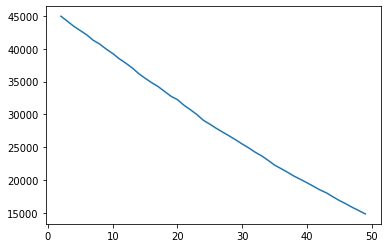

In [437]:
plt.plot(range(2,maxClusters),sse)

In [438]:
silh = []
for nClusters in range(2,maxClusters):
    kmeans = KMeans(n_clusters=nClusters, random_state=0).fit(dfNorm)
    silhouette_avg = silhouette_score(dfNorm, kmeans.labels_)
    silh.append(silhouette_avg)

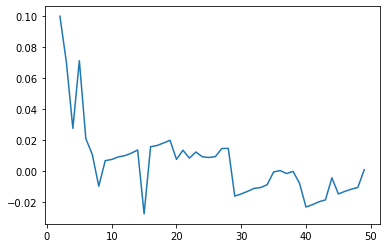

In [439]:
plt.plot(range(2,maxClusters),silh)

In [456]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(dfNorm)

In [457]:
cldata = pd.concat([data,pd.DataFrame(kmeans.labels_,columns=["Cluster"])],axis=1)

In [458]:
cldata.head(5)

,0,1,2,3,4,5,6,7,8,9,...,494,495,496,497,498,499,0,1,2,Cluster
0,0.052533,0.048973,0.048973,0.105066,0.052533,0.048973,0.052533,0.048973,0.105066,0.097946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.075915,0.920669,0.000000,2
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.985600,2
2,0.042308,0.000000,0.039442,0.000000,0.000000,0.000000,0.084617,0.000000,0.084617,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.900967,0.074681,0.024352,2
3,0.000000,0.000000,0.000000,0.000000,0.174919,0.000000,0.000000,0.163067,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.941773,0.000000,0.053485,2
4,0.000000,0.033617,0.000000,0.000000,0.000000,0.000000,0.000000,0.033617,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.123510,0.820104,0.056386,0


In [459]:
cldata['Cluster'].value_counts()

2    76
1     7
0     7
3     1
Name: Cluster, dtype: int64

# Standardize the data

In [405]:
stdata = StandardScaler().fit_transform(data)

# perform PCA to 2D

In [406]:
pca = decomposition.PCA()
pca.n_components = 2
pca_data = pca.fit_transform(data)

In [407]:
print(pca_data)

[[-0.04165947  0.79889196]
 [-0.64362603 -0.44359269]
 [ 0.65951513 -0.14207937]
 [ 0.67686633 -0.26398042]
 [-0.04789486  0.73249276]
 [ 0.77572244 -0.2374417 ]
 [-0.11260663  0.93873663]
 [ 0.65383908 -0.27813981]
 [ 0.73473993 -0.12776027]
 [-0.11556806  0.97212302]
 [-0.66863504 -0.47593131]
 [-0.12744607 -0.37457585]
 [ 0.56064816 -0.32667567]
 [-0.37686304  0.22738014]
 [-0.5953932  -0.35862371]
 [-0.6297178  -0.45027802]
 [-0.11958216  0.85166132]
 [-0.65558256 -0.46576625]
 [-0.53437554 -0.44697493]
 [-0.12488837  0.83317476]
 [ 0.7679059  -0.24388997]
 [-0.5533764  -0.38981388]
 [-0.44073825  0.09809567]
 [-0.65525507 -0.44406527]
 [ 0.80236431 -0.25774093]
 [-0.50093586 -0.06004806]
 [-0.66619991 -0.46068082]
 [ 0.01495352 -0.30771121]
 [-0.59398925 -0.460445  ]
 [ 0.75687386 -0.23227819]
 [-0.64368698 -0.45711181]
 [-0.65354629 -0.45395355]
 [-0.64866829 -0.39932955]
 [-0.62918265 -0.38179346]
 [-0.66009651 -0.44295097]
 [-0.25815681  0.38279183]
 [-0.65221368 -0.45397326]
 

# Plot the projection

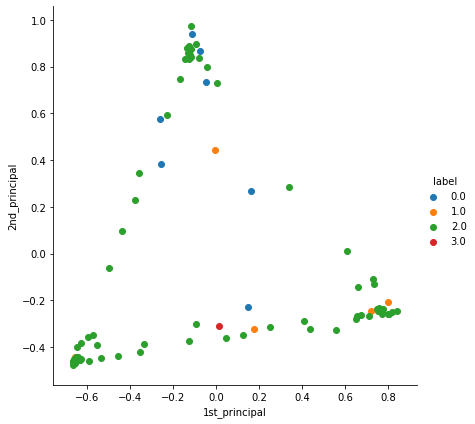

In [460]:
# attach labels
labels=cldata['Cluster']
pca_data = np.vstack((pca_data.T, labels)).T

# plot
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))
sn.FacetGrid(pca_df, hue="label", height=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

# find the number of PCs

In [463]:
maxComponents = 91
pca.n_components = maxComponents
pca_data = pca.fit_transform(stdata)

In [464]:
print(pca.explained_variance_)

[1.50183152e+01 1.32964087e+01 1.22121499e+01 1.18296796e+01
 1.16689449e+01 1.12799487e+01 1.10652401e+01 1.06060419e+01
 1.04240069e+01 1.00299553e+01 9.84752507e+00 9.80132622e+00
 9.42091662e+00 9.34551134e+00 8.93538150e+00 8.88496804e+00
 8.75470900e+00 8.49492338e+00 8.41044457e+00 8.28101193e+00
 8.00395542e+00 7.92172421e+00 7.89509807e+00 7.62408371e+00
 7.44785214e+00 7.40409886e+00 7.22559536e+00 7.21304045e+00
 7.04259983e+00 7.00474278e+00 6.86690741e+00 6.61045469e+00
 6.47467079e+00 6.42029432e+00 6.23511619e+00 6.18802662e+00
 6.10143475e+00 5.93505302e+00 5.77010499e+00 5.65076587e+00
 5.58599165e+00 5.52179696e+00 5.47285319e+00 5.35693151e+00
 5.25558807e+00 5.02464173e+00 4.99061003e+00 4.92328303e+00
 4.82188303e+00 4.71314195e+00 4.60843960e+00 4.52454611e+00
 4.40948852e+00 4.26775893e+00 4.22583766e+00 4.12162613e+00
 4.08794619e+00 4.05017552e+00 3.89730254e+00 3.81281072e+00
 3.72687894e+00 3.65118660e+00 3.62588873e+00 3.40292349e+00
 3.34847641e+00 3.271109

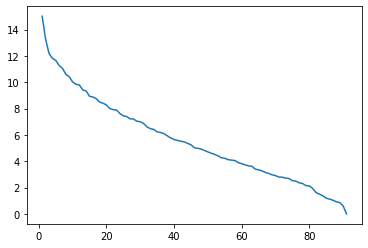

In [465]:
plt.plot(range(1,maxComponents+1),pca.explained_variance_)

In [466]:
pca.n_components = 20
pca_data = pca.fit_transform(data)
print(pca_data)

[[-0.04165958  0.79889224 -0.00403947 ...  0.11029151 -0.19607642
  -0.08832301]
 [-0.64362609 -0.44359265  0.07283418 ... -0.27745607  0.05137975
  -0.03790761]
 [ 0.65951523 -0.14207935 -0.07177079 ... -0.03213207 -0.0639363
   0.041336  ]
 ...
 [ 0.71201854 -0.26701153 -0.02558106 ... -0.06737411  0.0277425
   0.03898082]
 [-0.00404557  0.44191913  0.14541146 ... -0.0249546  -0.04434989
  -0.10345674]
 [-0.07752971  0.8674615   0.08281861 ... -0.00833936 -0.06083929
   0.03463543]]
